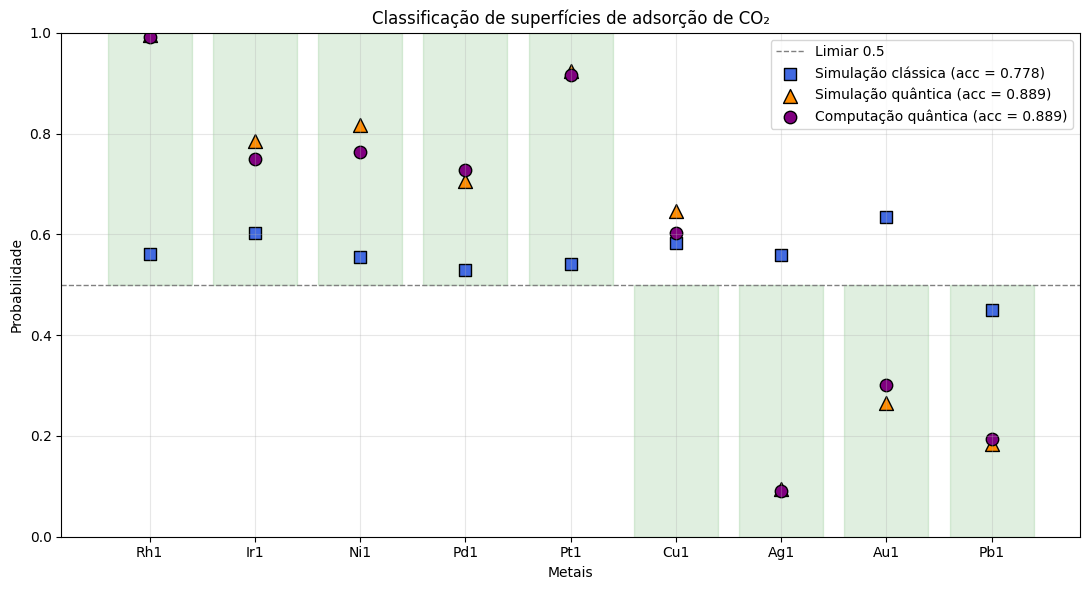

In [2]:
# =============================================
# Classificação de superfícies de adsorção de CO₂
# =============================================

import matplotlib.pyplot as plt
import numpy as np

# -------------------------------
# Dados
# -------------------------------
metals = ["Rh1", "Ir1", "Ni1", "Pd1", "Pt1", "Cu1", "Ag1", "Au1", "Pb1"]
x = np.arange(len(metals))

# Ground truth (coluna 3 das tabelas)
y_true = [1, 1, 1, 1, 1, 0, 0, 0, 0]

# Probabilidades (coluna 5 de cada tabela)
logreg_proba    = [0.562, 0.603, 0.555, 0.530, 0.541, 0.583, 0.560, 0.635, 0.450]  # Clássica
qlr_sv1_proba   = [0.996, 0.786, 0.818, 0.705, 0.924, 0.646, 0.095, 0.266, 0.185]  # Quântica (simulada)
qlr_ankaa_proba = [0.991, 0.749, 0.764, 0.727, 0.916, 0.603, 0.090, 0.302, 0.194]  # Computação quântica

# Acurácias
acc_classica = 0.778
acc_quantica = 0.889
acc_comp_q   = 0.889

# -------------------------------
# Gráfico
# -------------------------------
plt.figure(figsize=(11, 6))

# Pinta apenas a metade "esperada" (verde) conforme o ground truth
for i, truth in enumerate(y_true):
    if truth == 1:
        plt.gca().add_patch(
            plt.Rectangle((i - 0.4, 0.5), 0.8, 0.5, color='green', alpha=0.12)
        )
    else:
        plt.gca().add_patch(
            plt.Rectangle((i - 0.4, 0.0), 0.8, 0.5, color='green', alpha=0.12)
        )

# Linha limiar (y = 0.5)
plt.axhline(0.5, linestyle='--', linewidth=1, color='gray', label='Limiar 0.5')

# Marcadores sem preenchimento com contornos coloridos
plt.scatter(x, logreg_proba, facecolors='royalblue', edgecolors='black', marker='s', s=80,
            label=f"Simulação clássica (acc = {acc_classica:.3f})")
plt.scatter(x, qlr_sv1_proba, facecolors='darkorange', edgecolors='black', marker='^', s=100,
            label=f"Simulação quântica (acc = {acc_quantica:.3f})")
plt.scatter(x, qlr_ankaa_proba, facecolors='purple', edgecolors='black', marker='o', s=80,
            label=f"Computação quântica (acc = {acc_comp_q:.3f})")

# -------------------------------
# Estética e rótulos
# -------------------------------
plt.xticks(x, metals)
plt.ylim(0, 1)
plt.xlabel("Metais")
plt.ylabel("Probabilidade")
plt.title("Classificação de superfícies de adsorção de CO₂")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()